01.데이터전처리 후 생성된 데이터셋 : total_df.pkl, total_df.csv
02.아래는 탐색적 분석(EDA) 수행
 1)전처리된 Dataset를 불러온다.
 2)항목(풍향, 풍속, 온도,,,,PM)의 데이터 간 연관성을 본다

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import re

import warnings
warnings.filterwarnings('ignore')

 <!-- 1)전처리된 Dataset를 불러온다. -->

In [4]:
total_df = pd.read_pickle('./total_df.pkl')
total_df

,일시,측정소명,풍향,풍속,온도,습도,강수량,PM
1,2021-01-01 01:00:00,강남,327.0,1.3,-7.0,55.0,0.0,13.0
2,2021-01-01 02:00:00,강남,309.0,1.1,-6.8,55.0,0.0,13.0
3,2021-01-01 03:00:00,강남,45.0,0.9,-7.0,57.0,0.0,12.0
4,2021-01-01 04:00:00,강남,304.0,0.6,-7.5,57.0,0.0,13.0
5,2021-01-01 05:00:00,강남,82.0,0.8,-7.7,60.0,0.0,14.0
...,...,...,...,...,...,...,...,...
529579,2023-09-30 19:00:00,중랑,285.0,1.1,21.7,87.0,0.0,21.0
529580,2023-09-30 20:00:00,중랑,284.0,1.4,21.2,91.0,0.0,26.0
529581,2023-09-30 21:00:00,중랑,279.0,1.2,20.5,89.0,0.0,23.0
529582,2023-09-30 22:00:00,중랑,301.0,1.7,20.2,59.0,0.0,23.0


In [6]:
# import pandas as pd
ttt_df = pd.read_csv('./total_df.csv')
ttt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529471 entries, 0 to 529470
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  529471 non-null  int64  
 1   일시          529471 non-null  object 
 2   측정소명        529471 non-null  object 
 3   풍향          529471 non-null  float64
 4   풍속          529471 non-null  float64
 5   온도          529471 non-null  float64
 6   습도          529471 non-null  float64
 7   강수량         529471 non-null  float64
 8   PM          529471 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 36.4+ MB


###<font color='red'>Plot내 한글처리를 위해 Matplotlib의 Font를 한글폰트로 지정</font>

In [7]:
import matplotlib.pyplot as plt
import platform
# plt.rcParams['font.family'] = 'Malgun Gothic'


if platform.system() == 'Darwin': # MAC
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
    
plt.rcParams['font.size'] = 12    
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결


2)항목(풍향, 풍속, 온도,,,,PM)의 데이터 간 연관성을 본다 : 아래에서 나타난 결과는 '연관성'이 아주 적은것으로 나타남

In [8]:
import scipy
# cor_df = total_df.iloc[:,1:]
# cor_df = total_df.iloc[:,2:].corr(method='pearson')
# cor_df = total_df.iloc[:,2:].corr(method='kendall')
cor_df = total_df.iloc[:,2:].corr(method='spearman')
cor_df

,풍향,풍속,온도,습도,강수량,PM
풍향,1.000000,0.127687,-0.025284,-0.106631,-0.020714,0.032364
풍속,0.127687,1.000000,0.070976,-0.245799,0.019588,-0.119507
온도,-0.025284,0.070976,1.000000,0.246998,0.078703,-0.204644
습도,-0.106631,-0.245799,0.246998,1.000000,0.354195,-0.085618
강수량,-0.020714,0.019588,0.078703,0.354195,1.000000,-0.213184
PM,0.032364,-0.119507,-0.204644,-0.085618,-0.213184,1.000000


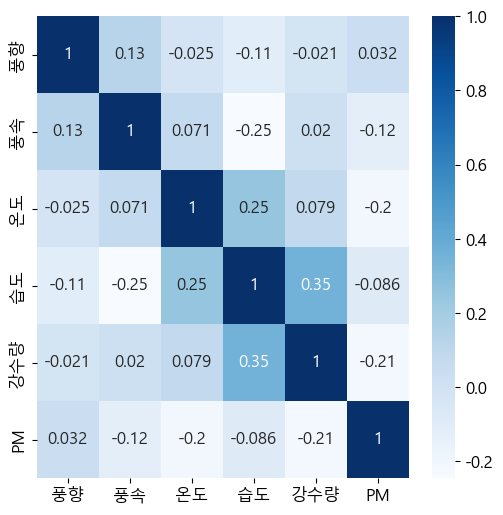

In [9]:
import seaborn as sns
plt.figure(figsize=(6,6))

sns.heatmap(cor_df, annot=True, cmap='Blues')
plt.show()

In [10]:
# 날짜데이터 TYPE을 'object'에서 'datetime'으로 변경
total_df.일시 = pd.to_datetime(total_df.일시)
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 529471 entries, 1 to 529583
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   일시      529471 non-null  datetime64[ns]
 1   측정소명    529471 non-null  object        
 2   풍향      529471 non-null  float64       
 3   풍속      529471 non-null  float64       
 4   온도      529471 non-null  float64       
 5   습도      529471 non-null  float64       
 6   강수량     529471 non-null  float64       
 7   PM      529471 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 36.4+ MB


In [11]:
total_df

,일시,측정소명,풍향,풍속,온도,습도,강수량,PM
1,2021-01-01 01:00:00,강남,327.0,1.3,-7.0,55.0,0.0,13.0
2,2021-01-01 02:00:00,강남,309.0,1.1,-6.8,55.0,0.0,13.0
3,2021-01-01 03:00:00,강남,45.0,0.9,-7.0,57.0,0.0,12.0
4,2021-01-01 04:00:00,강남,304.0,0.6,-7.5,57.0,0.0,13.0
5,2021-01-01 05:00:00,강남,82.0,0.8,-7.7,60.0,0.0,14.0
...,...,...,...,...,...,...,...,...
529579,2023-09-30 19:00:00,중랑,285.0,1.1,21.7,87.0,0.0,21.0
529580,2023-09-30 20:00:00,중랑,284.0,1.4,21.2,91.0,0.0,26.0
529581,2023-09-30 21:00:00,중랑,279.0,1.2,20.5,89.0,0.0,23.0
529582,2023-09-30 22:00:00,중랑,301.0,1.7,20.2,59.0,0.0,23.0


In [12]:
#특정날짜 이후 데이터 추출
total_df = total_df[total_df.일시 >= '2021-01-05'] 

In [13]:
total_df.describe()

,일시,풍향,풍속,온도,습도,강수량,PM
count,527472,527472.000000,527472.000000,527472.000000,527472.000000,527472.000000,527472.000000
mean,2022-05-19 11:30:00.000001536,177.853848,1.386204,14.604994,59.490514,0.174155,19.315164
min,2021-01-05 00:00:00,0.000000,0.000000,-32.900000,0.000000,0.000000,1.000000
25%,2021-09-11 17:45:00,91.000000,0.882219,6.300000,44.000000,0.000000,9.000000
50%,2022-05-19 11:30:00,173.000000,1.300000,16.100000,59.000000,0.000000,15.000000
75%,2023-01-24 05:15:00,268.000000,1.800000,23.800000,76.000000,0.000000,25.000000
max,2023-09-30 23:00:00,360.000000,8.100000,38.300000,100.000000,92.500000,237.000000
std,NaN,103.641906,0.746166,10.909738,20.776584,1.338596,15.809544


'측정소명', '일자' 기준으로 Groupby하여 그룹별 'PM'의 일 평균값(mean)을 dataset(grp1)으로 만든다

In [14]:
grp1 = pd.DataFrame(total_df.groupby([total_df.측정소명, total_df.일시.dt.date])['PM'].mean())

grp1.index.names = ['측정소명', '일자']
grp1.reset_index(inplace = True)
grp1.일자 = pd.to_datetime(grp1.일자) 
grp1

,측정소명,일자,PM
0,강남,2021-01-05,15.833333
1,강남,2021-01-06,13.666667
2,강남,2021-01-07,12.250000
3,강남,2021-01-08,10.625000
4,강남,2021-01-09,15.000000
...,...,...,...
21973,중랑,2023-09-26,3.078704
21974,중랑,2023-09-27,4.645833
21975,중랑,2023-09-28,31.416667
21976,중랑,2023-09-29,21.000000


'일자', '측정소'를 각각 행열로 한 pm값을 가지는 데이터셋 구성(pvt1)

In [16]:
pvt1 = grp1.pivot(index = ['일자'], columns = '측정소명', values = 'PM')
pvt1.head()

측정소명,강남,강동,강북,강서,관악,광진,구로,금천,노원,도봉,...,서대문,서초,성동,성북,송파,양천,용산,은평,중구,중랑
일자,,,,,,,,,,,,,,,,,,,,,
2021-01-05,15.833333,18.541667,14.750000,14.500000,11.708333,15.291667,11.458333,17.166667,19.354167,14.666667,...,14.479167,14.083333,14.625000,11.583333,13.083333,15.708333,12.125000,13.520833,15.750000,12.791667
2021-01-06,13.666667,17.875000,13.833333,13.000000,9.458333,14.333333,7.187500,14.250000,18.958333,11.583333,...,12.854167,10.750000,13.125000,10.333333,12.708333,13.458333,10.916667,9.541667,14.375000,11.666667
2021-01-07,12.250000,14.291667,12.541667,11.916667,8.416667,11.958333,6.583333,12.541667,13.958333,9.375000,...,10.333333,8.041667,12.604167,8.833333,10.083333,12.125000,9.458333,9.687500,12.000000,10.250000
2021-01-08,10.625000,13.562500,11.333333,11.541667,7.583333,10.625000,7.020833,12.041667,14.541667,8.729167,...,8.479167,5.750000,10.416667,7.229167,9.500000,11.708333,7.833333,8.583333,11.625000,9.250000
2021-01-09,15.000000,19.625000,17.583333,14.708333,12.000000,15.666667,9.583333,17.333333,21.000000,14.416667,...,14.583333,11.375000,14.916667,12.833333,14.291667,16.000000,12.958333,11.500000,15.708333,12.708333


In [15]:
pvt1

측정소명,강남,강동,강북,강서,관악,광진,구로,금천,노원,도봉,...,서대문,서초,성동,성북,송파,양천,용산,은평,중구,중랑
일자,,,,,,,,,,,,,,,,,,,,,
2021-01-05,15.833333,18.541667,14.750000,14.500000,11.708333,15.291667,11.458333,17.166667,19.354167,14.666667,...,14.479167,14.083333,14.625000,11.583333,13.083333,15.708333,12.125000,13.520833,15.750000,12.791667
2021-01-06,13.666667,17.875000,13.833333,13.000000,9.458333,14.333333,7.187500,14.250000,18.958333,11.583333,...,12.854167,10.750000,13.125000,10.333333,12.708333,13.458333,10.916667,9.541667,14.375000,11.666667
2021-01-07,12.250000,14.291667,12.541667,11.916667,8.416667,11.958333,6.583333,12.541667,13.958333,9.375000,...,10.333333,8.041667,12.604167,8.833333,10.083333,12.125000,9.458333,9.687500,12.000000,10.250000
2021-01-08,10.625000,13.562500,11.333333,11.541667,7.583333,10.625000,7.020833,12.041667,14.541667,8.729167,...,8.479167,5.750000,10.416667,7.229167,9.500000,11.708333,7.833333,8.583333,11.625000,9.250000
2021-01-09,15.000000,19.625000,17.583333,14.708333,12.000000,15.666667,9.583333,17.333333,21.000000,14.416667,...,14.583333,11.375000,14.916667,12.833333,14.291667,16.000000,12.958333,11.500000,15.708333,12.708333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-26,3.166667,7.000000,1.677083,2.166667,3.416667,1.562500,1.250000,2.375000,2.380208,1.604167,...,1.979167,1.333333,3.770833,1.437500,3.354167,2.208333,2.041667,2.166667,3.166667,3.078704
2023-09-27,5.291667,7.000000,3.927083,4.479167,5.562500,4.395833,2.750000,4.708333,5.291667,3.083333,...,5.270833,3.125000,4.875000,4.041667,4.604167,4.750000,5.437500,5.041667,4.000000,4.645833
2023-09-28,32.666667,7.000000,30.666667,30.166667,34.041667,29.875000,33.500000,31.791667,30.666667,30.416667,...,35.000000,34.208333,31.000000,31.083333,30.250000,33.041667,31.583333,33.875000,30.541667,31.416667


데이터셋(pvt1)의 이동평균선(rolling(이동평균일수 '7'일))을 그린다.

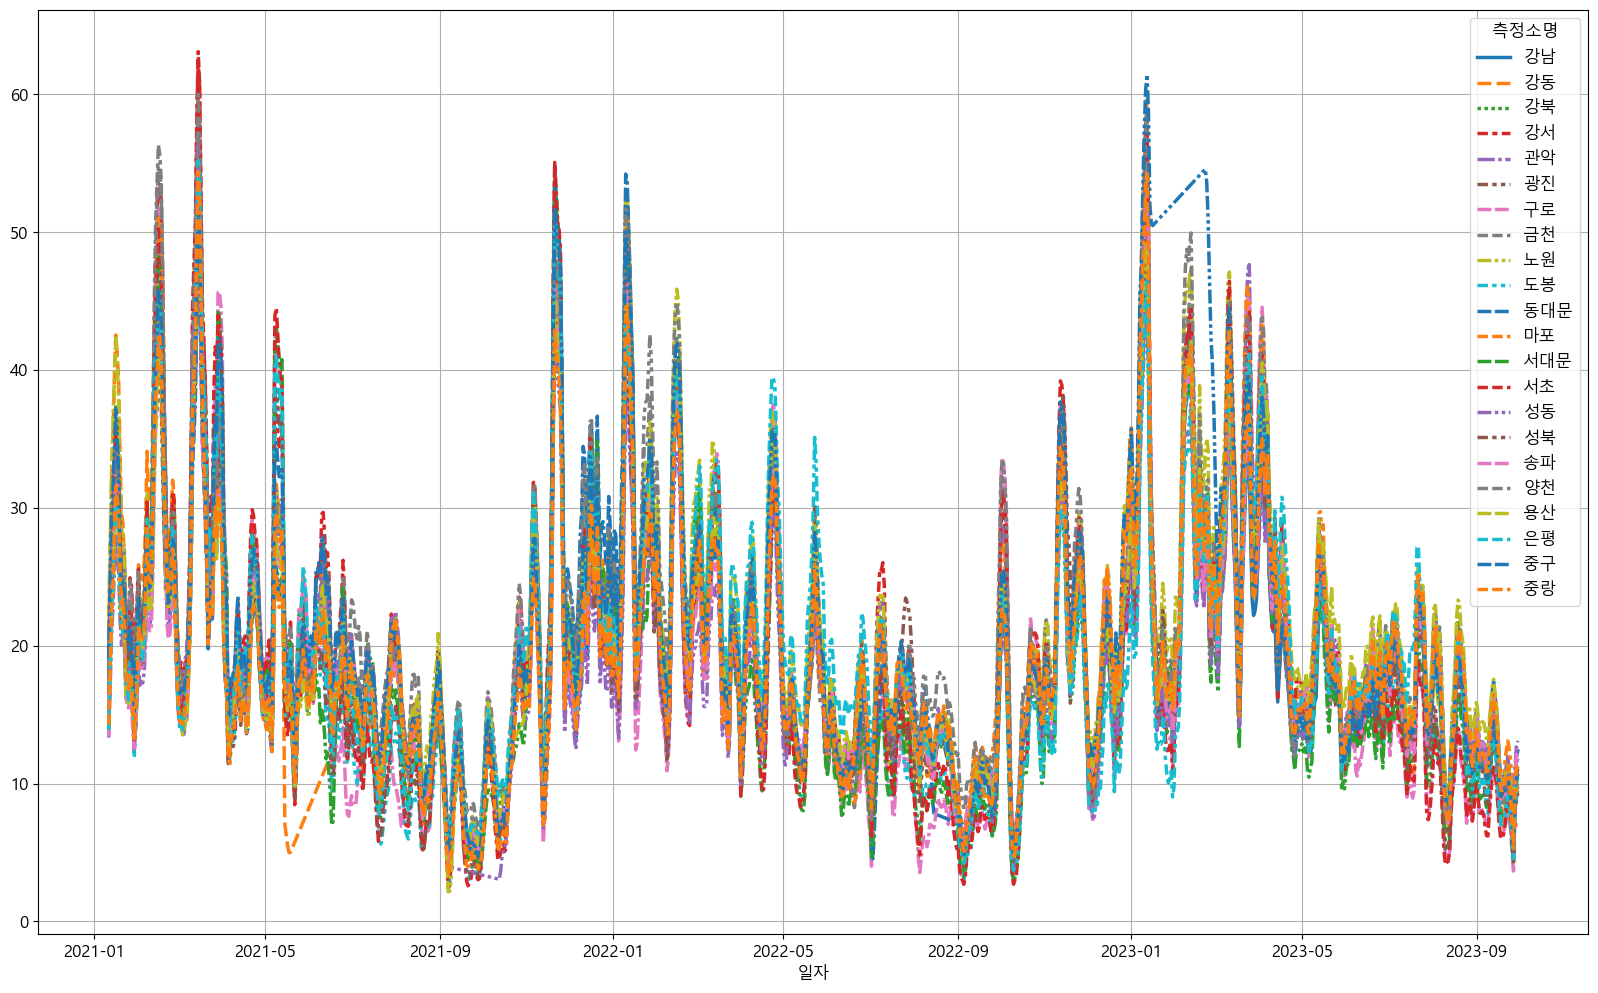

In [17]:
data = pvt1.rolling(7).mean()
data.head(10)
f, ax = plt.subplots(figsize=(20,12))
sns.lineplot(data=data, palette="tab10", linewidth=2.5, ax = ax)
plt.grid()
plt.show()

In [18]:
data
# datapart = data[data.측정소명 != '중량']# & data.일자 == '2021-05%']
# df = merge_df[merge_df.측정소명 == '중랑']
# datapart = data.columns.values[:] == '중량'
# datapart
# grp2 = pd.DataFrame(total_df.groupby([total_df.측정소명, total_df.일시.dt.year, total_df.일시.dt.month])['PM'].mean())
# grp2

측정소명,강남,강동,강북,강서,관악,광진,구로,금천,노원,도봉,...,서대문,서초,성동,성북,송파,양천,용산,은평,중구,중랑
일자,,,,,,,,,,,,,,,,,,,,,
2021-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-26,7.482143,7.0,6.028274,7.104167,8.080357,5.848214,4.898810,6.282738,7.148810,5.607143,...,5.883929,6.002976,7.580357,5.508929,7.294643,6.369048,7.238095,5.464286,7.148810,6.821429
2023-09-27,5.946429,7.0,4.642857,5.563988,6.815476,4.470238,3.654762,5.080357,5.714286,4.348214,...,4.958333,4.895833,6.190476,4.080357,5.827381,5.065476,6.008929,4.559524,5.482143,5.312500
2023-09-28,9.970238,7.0,8.520833,8.806548,10.985119,8.291667,8.035714,9.190476,9.451346,8.205357,...,9.404762,9.008929,9.886905,8.107143,9.610119,9.315476,9.794643,8.916667,9.351190,9.252976


01.에서 전처리된 데이터셋(total_df)을 '측정소명', '연', '월'로 Groupby하여 PM의 평균값(mean)을 구한 데이터셋(grp2) 구성

In [19]:
grp2 = pd.DataFrame(total_df.groupby([total_df.측정소명, total_df.일시.dt.year, total_df.일시.dt.month])['PM'].mean())
grp2.index.names = ['측정소명', '연', '월']
grp2.reset_index(inplace = True)
grp2['연월'] = grp2.연.astype('str') + grp2.월.apply(lambda st: str(st).rjust(2, '0'))
grp2

,측정소명,연,월,PM,연월
0,강남,2021,1,22.723765,202101
1,강남,2021,2,31.115327,202102
2,강남,2021,3,33.558468,202103
3,강남,2021,4,19.484028,202104
4,강남,2021,5,19.413978,202105
...,...,...,...,...,...
721,중랑,2023,5,18.331989,202305
722,중랑,2023,6,17.657639,202306
723,중랑,2023,7,18.241263,202307
724,중랑,2023,8,14.419355,202308


grp2 Dataset의 행,열을 각각 '연월', '측정소명'로 하여 표기
**grp2 : '측정소명', '연', '월'로 Groupby하여 PM의 평균값(mean)을 구한 데이터셋

In [20]:
pvt2 = grp2.pivot(index = ['연월'], columns = '측정소명', values = 'PM')
pvt2.head()

측정소명,강남,강동,강북,강서,관악,광진,구로,금천,노원,도봉,...,서대문,서초,성동,성북,송파,양천,용산,은평,중구,중랑
연월,,,,,,,,,,,,,,,,,,,,,
202101,22.723765,25.804012,22.132716,23.206790,18.112654,21.702932,21.041667,23.783179,25.761574,21.063272,...,21.411265,21.838735,21.216821,19.902778,19.537037,23.442130,19.261574,19.394290,23.158179,19.825617
202102,31.115327,30.999256,28.754464,31.915179,26.523065,29.354167,29.003720,33.055060,30.799851,27.717262,...,30.036458,30.765625,27.691220,26.145833,25.703125,31.946429,26.460565,28.735119,28.722470,27.847470
202103,33.558468,34.575269,30.592742,35.734543,28.344086,31.014785,35.606183,33.914651,29.764113,30.601478,...,34.740591,37.131048,33.120296,29.007392,28.739919,34.315188,28.714382,33.061828,32.108199,29.401882
202104,19.484028,20.127778,17.138194,18.637500,17.330556,18.233333,20.592361,19.427778,18.543750,17.281250,...,19.790972,20.772917,18.595139,16.749306,18.065278,18.016667,17.291667,19.496528,20.061806,16.666667
202105,19.413978,12.645627,16.799095,22.079973,18.690860,19.059140,21.963038,20.732527,18.915323,20.198925,...,23.660618,21.479839,18.686156,20.810484,20.084677,19.397177,17.407930,23.073925,21.000000,18.313844


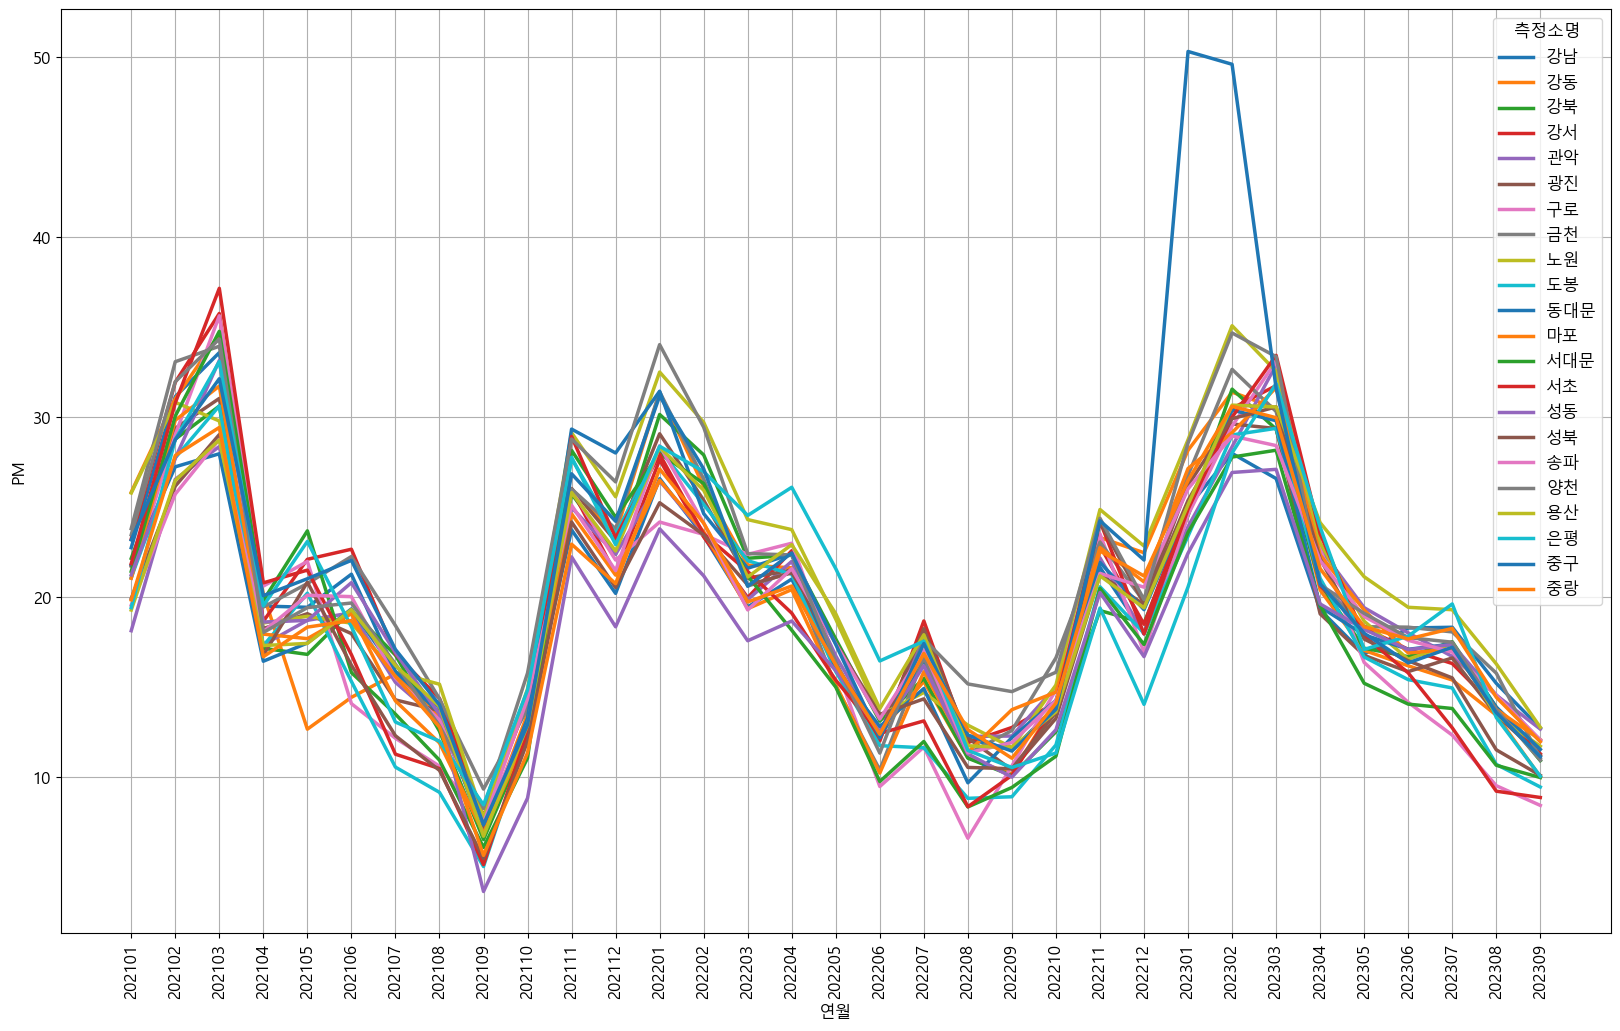

In [21]:
_, ax = plt.subplots(figsize=(20,12))
sns.lineplot(data=grp2, x='연월', y = 'PM', hue='측정소명',  palette="tab10", linewidth=2.5, ax = ax)
plt.xticks(rotation=90)
plt.grid()
plt.show()

위 그래프에서 PM의 월평균값이 이상치를 나타내는 구간인 '202105월', '202301월', '202302월'에 대한 'PM데이터' 확인
1) '202105월' 이상값은 '강동'측정소

In [22]:
grp2p = grp2[grp2.연월 == '202105'].sort_values(['PM'], ascending=[False])
grp2p
# grp2p = grp2[grp2.PM >= 50]
# grp2p
# grp2p = grp2[grp2.측정소명 == '중구']
# grp2p

,측정소명,연,월,PM,연월
400,서대문,2021,5,23.660618,202105
631,은평,2021,5,23.073925,202105
103,강서,2021,5,22.079973,202105
202,구로,2021,5,21.963038,202105
433,서초,2021,5,21.479839,202105
664,중구,2021,5,21.000000,202105
499,성북,2021,5,20.810484,202105
235,금천,2021,5,20.732527,202105
301,도봉,2021,5,20.198925,202105
532,송파,2021,5,20.084677,202105


In [22]:
grp1.head()

,측정소명,일자,PM
0,강남,2021-01-05,15.833333
1,강남,2021-01-06,13.666667
2,강남,2021-01-07,12.250000
3,강남,2021-01-08,10.625000
4,강남,2021-01-09,15.000000


In [24]:
# grp1.set_index(grp1.일자, inplace = True)
# grp1

2) '202301월', '202302월' 이상값은 '중구' 측정소로 나타남(아래 데이터 확인)

In [23]:
grp1.일자 = pd.to_datetime(grp1.일자)
grp1.set_index(grp1.일자, inplace = True)
# sub_df = grp1.loc['2023-01-01':'2023-02-28',:] KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'
sub_df = grp1.sort_index().loc['2023-01-01':'2023-02-28',:]
sub_df[sub_df.측정소명 == '중구']

,측정소명,일자,PM
일자,,,
2023-01-01,중구,2023-01-01,46.437500
2023-01-02,중구,2023-01-02,13.958333
2023-01-03,중구,2023-01-03,20.125000
2023-01-04,중구,2023-01-04,28.916667
2023-01-05,중구,2023-01-05,42.208333
2023-01-06,중구,2023-01-06,69.166667
2023-01-07,중구,2023-01-07,98.083333
2023-01-08,중구,2023-01-08,59.875000
2023-01-09,중구,2023-01-09,51.975790


In [24]:
total_df

,일시,측정소명,풍향,풍속,온도,습도,강수량,PM
96,2021-01-05 00:00:00,강남,284.0,1.2,-2.4,73.0,0.0,29.0
97,2021-01-05 01:00:00,강남,316.0,1.1,-2.4,75.0,0.0,28.0
98,2021-01-05 02:00:00,강남,252.0,1.3,-2.0,72.0,0.0,28.0
99,2021-01-05 03:00:00,강남,295.0,1.6,-1.7,69.0,0.0,26.0
100,2021-01-05 04:00:00,강남,245.0,2.4,-2.0,68.0,0.0,29.0
...,...,...,...,...,...,...,...,...
529579,2023-09-30 19:00:00,중랑,285.0,1.1,21.7,87.0,0.0,21.0
529580,2023-09-30 20:00:00,중랑,284.0,1.4,21.2,91.0,0.0,26.0
529581,2023-09-30 21:00:00,중랑,279.0,1.2,20.5,89.0,0.0,23.0
529582,2023-09-30 22:00:00,중랑,301.0,1.7,20.2,59.0,0.0,23.0


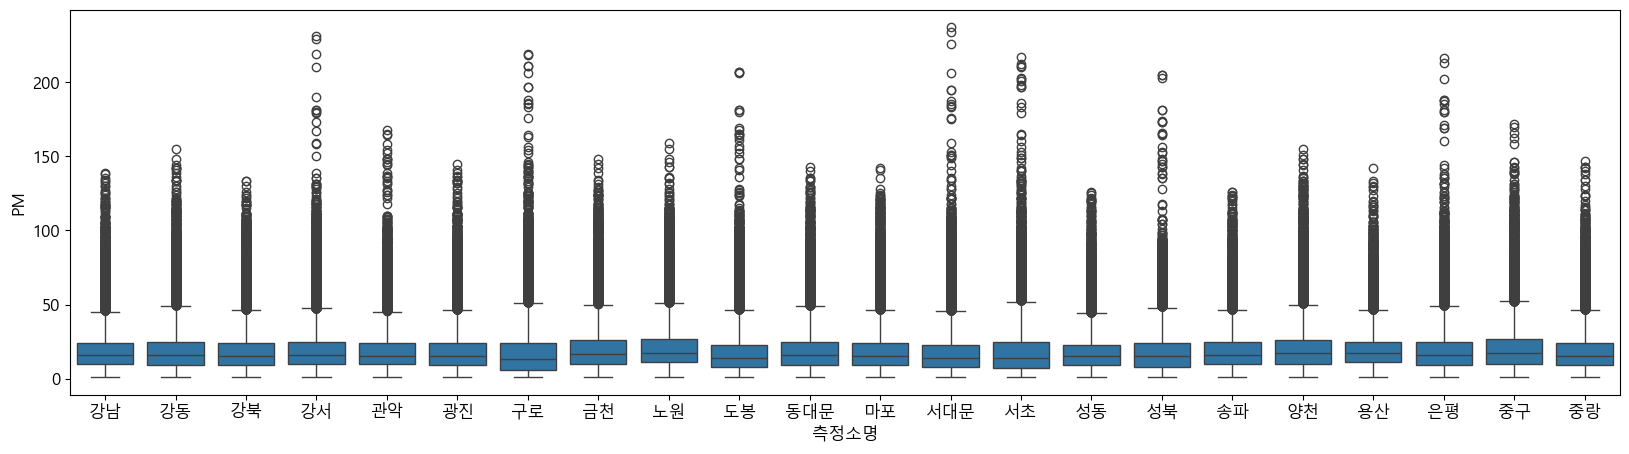

In [25]:
plt.figure(figsize=(20,5))
sns.boxplot(x = '측정소명', y = 'PM', data = total_df)
plt.show()

In [26]:
# first line이 아닌 이 코드 부터 실행 할 경우 실행코드
# import pandas as pd
# total_df = pd.read_pickle('./total_df.pkl')
# total_df = total_df[total_df.일시 >= '2021-01-05'] 
# total_df

'측정소명' 기준으로 Groupby 하여 'PM'의 최대값(max)을 얻는 후, 최대값을 정수(int)로 변경한다.

In [4]:
grp3 = pd.DataFrame(total_df.groupby('측정소명')['PM'].max())
grp3.PM = grp3.PM.round().astype('int')
grp3.reset_index(inplace = True)
print(grp3.sort_values('PM', ascending=False))

   측정소명   PM
12  서대문  237
3    강서  231
6    구로  219
13   서초  217
19   은평  216
9    도봉  207
15   성북  205
20   중구  172
4    관악  168
8    노원  159
17   양천  155
1    강동  155
7    금천  148
21   중랑  147
5    광진  145
10  동대문  143
18   용산  142
11   마포  142
0    강남  139
2    강북  133
16   송파  126
14   성동  126


In [28]:
# 측정소별 PM의 중간값을 구하고, PM중값값(13~18)을 기준으로 측정소 분류
grp3 = pd.DataFrame(total_df.groupby('측정소명')['PM'].median())
grp3.PM = grp3.PM.round().astype('int')
grp3.reset_index(inplace = True)
for pm in range(13, 18):
    print(pm, '-'*20)
    print(list(grp3[grp3.PM == pm]['측정소명']))

13 --------------------
['구로']
14 --------------------
['도봉', '서대문', '서초']
15 --------------------
['강북', '관악', '광진', '마포', '성동', '성북', '중랑']
16 --------------------
['강남', '강동', '강서', '동대문', '송파', '은평']
17 --------------------
['금천', '노원', '양천', '용산', '중구']
